## Quiz #0503

### "Data Augmentation"

#### Answer the following questions by providing Python code:
#### Objectives:
- Code the helper functions.
- Optimize and test a predictive model of your choice.
- Carry out data aumentation in order to improve the predictive accuracy when the given training data is small.

In [296]:
import numpy as np
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
#from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
from scipy.ndimage.interpolation import rotate
warnings.filterwarnings(action='ignore')   
from  scipy import *
# Turn off the warnings.
%matplotlib inline

#### Read in data:
The explanation on the original data can be found [here](http://yann.lecun.com/exdb/mnist/).

- The data we will be using is a small subset of the original data with only 100 observations.
- Each observation is the "flattened" version of a image.
- The first column corresponds to the label (Y).
- The image size is 28x28.

In [297]:
# Read the training and testing data separately.
data_train = pd.read_csv('data_mnist_train_100.csv', header=None,encoding='latin1')
data_test = pd.read_csv('data_mnist_test_100.csv', header=None,encoding='latin1')

# Scale and split the data set into X and Y.
X_train = np.array((data_train.iloc[:,1:]/255.0)*0.99+0.01)
X_test = np.array((data_test.iloc[:,1:]/255.0)*0.99+0.01)
Y_train = np.array(data_train.iloc[:,0])
Y_test = np.array(data_test.iloc[:,0])

1). Code the helper function 'show_data()' that visualizes each given observation. HINT: use matplotlib.pyplot.imshow() and scipy.ndimage.interpolation().

In [298]:
from scipy import ndimage, misc
from matplotlib import pyplot as plt

def show_data(X,Y, n,angle=0):
    a = X[n].reshape(28,28)  # reshape from 1d to 2d pixel array
    a_r=ndimage.rotate(a, angle,mode = 'mirror')
    
    plt.imshow(a_r, cmap = "gray")
       # <Your code goes in here>

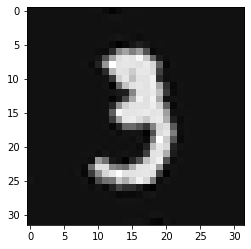

In [299]:
# Example 1.
show_data(X_train, Y_train,10,+10)

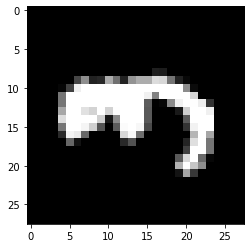

In [300]:
# Example 2.
show_data(X_train, Y_train,10,90)

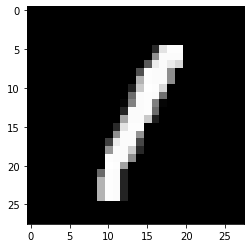

In [301]:
# Example 3.
show_data(X_train, Y_train,77,0)

2). Choose an algorithm and carry out the predictive analysis.

- Optimize the hyperparameter(s).
- Calculate the accuracy.
- Is the accuracy high enough?

In [302]:
from sklearn.decomposition import PCA
#Applying PCA
pca = PCA(n_components = 2)
pca.fit(data_train)

PCA(n_components=2)

In [303]:
# Scale and split the data set into X and Y.
X_train = np.array((data_train.iloc[:,1:]/255.0)*0.99+0.01)
X_test = np.array((data_test.iloc[:,1:]/255.0)*0.99+0.01)
Y_train = np.array(data_train.iloc[:,0])
Y_test = np.array(data_test.iloc[:,0])

In [304]:
from sklearn.model_selection import RandomizedSearchCV
rs=RandomizedSearchCV(RandomForestClassifier(),{'n_estimators': [100,200,300]},
                   cv=5, 
return_train_score=False, 
n_iter=2 )

rs.fit(X_train, Y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=2,
                   param_distributions={'n_estimators': [100, 200, 300]})

In [305]:
rs.best_score_

0.79

In [306]:
rs.best_params_

{'n_estimators': 100}

In [307]:
clf = RandomForestClassifier(n_estimators = 300)  
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(Y_test, y_pred))


ACCURACY OF THE MODEL:  0.73


the accuracy is relatively low

3). Code the helper function 'rotate_data()' that rotates each given observation by an angle. HINT: use scipy.ndimage.interpolation().

In [308]:
from scipy import ndimage, misc
from matplotlib import pyplot as plt

def rotate_data(X,Y, n,angle=0):
    a = X[n].reshape(28,28)  # reshape from 1d to 2d pixel array
    a_r=ndimage.rotate(a, angle,mode = 'mirror')
    
    plt.imshow(a_r, cmap = "gray")
       # <Your code goes in here>
        

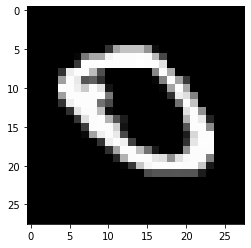

In [309]:
rotate_data(X_train, Y_train,1,90)

4). Augment the training dataset.
- Increase the size of the training dataset by introducing slight rotations (clockwise and counterclockwise).
- Use the 'rotate_data()' function defined in the previous step.
- No need to augment the testing dataset.
- Target approximately five fold aumentation.

In [310]:
data_train.shape

(100, 785)

In [311]:
len(data_train)

100

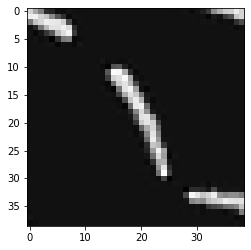

In [312]:
for i in range(0,100):
    data_train=data_train.append(rotate_data(X_train, Y_train,i,90))
for i in range(0,100):
    data_train=data_train.append(rotate_data(X_train, Y_train,i,-90))
for i in range(0,100):
    data_train=data_train.append(rotate_data(X_train, Y_train,i,180))
for i in range(0,100):
    data_train=data_train.append(rotate_data(X_train, Y_train,i,-180))
for i in range(0,100):
    data_train=data_train.append(rotate_data(X_train, Y_train,i,50))

5). Redo the predictive analysis with the augmented training dataset.

- Use the same algorithm as in the step 2).
- Calculate the accuracy.
- Has the accuracy gone up?

In [313]:
# Scale and split the data set into X and Y.
X_train = np.array((data_train.iloc[:,1:]/255.0)*0.99+0.01)
X_test = np.array((data_test.iloc[:,1:]/255.0)*0.99+0.01)
Y_train = np.array(data_train.iloc[:,0])
Y_test = np.array(data_test.iloc[:,0])

In [314]:
clf = RandomForestClassifier(n_estimators = 300)  
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(Y_test, y_pred))



ACCURACY OF THE MODEL:  0.71


the accuracy is going up whene we added more columns to the dataset (it can do batter if we add more columns)